In [1]:
import pandas as pd
import numpy as np
import datetime
import sklearn
import scikit_posthocs as sp
import statsmodels.formula.api as sfa
import statsmodels.api as sa
import os
from pathlib import Path
import statsmodels
import scipy
import neurokit2 as nk
import seaborn as sns

import tqdm 


from collections import Counter
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('adaptivedf.csv')
df
dfQ = pd.read_csv('Q_ada.csv')
dfQ
dfAll = pd.merge(df, dfQ, on =["PId", "BlockNumber"], how="left")
dfAll
#df = df.rename(columns={"HR_Mean": "HR (bpm)", "HRV_SDNN": "HRV (ms)"}, errors="raise")

,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,...,NASAMentalDemand,NASAPhysDemand,NASATempDemand,NASAPerformance,NASAEffort,NASAFrustration,RawNASASum,RawNASA,UX1,UX2
0,1.662020e+09,1,1,2,1.662020e+09,360.01669,0.915730,163,0,178,...,5,1,11,4,4,5,30,0.500000,4,4
1,1.662020e+09,6,1,2,1.662021e+09,360.35229,0.941463,193,0,205,...,5,1,6,2,8,5,27,0.450000,4,2
2,1.662021e+09,4,1,2,1.662021e+09,360.05591,0.817734,166,0,203,...,10,1,12,3,9,2,37,0.616667,4,4
3,1.662022e+09,2,1,2,1.662022e+09,360.02358,0.904977,200,0,221,...,6,1,7,2,4,4,24,0.400000,4,6
4,1.662022e+09,7,2,2,1.662023e+09,360.03858,0.730159,138,3,192,...,3,1,14,1,2,1,22,0.366667,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.662648e+09,7,2,2,1.662648e+09,360.08251,0.877451,179,1,205,...,10,13,6,4,11,13,57,0.950000,5,5
115,1.662649e+09,3,1,2,1.662649e+09,360.04636,0.847059,216,0,255,...,10,13,9,3,10,16,61,1.016667,3,5
116,1.662649e+09,2,1,2,1.662649e+09,360.01682,0.901818,248,0,275,...,10,16,6,4,10,17,63,1.050000,3,5
117,1.662650e+09,5,1,2,1.662650e+09,360.06204,0.888889,232,1,262,...,10,13,6,5,10,18,62,1.033333,5,5


In [66]:
from scipy import stats
res = stats.pearsonr(dfAll["NBackAccuracy"], dfAll["EDATonic"])
res

(0.10844511722874225, 0.24040482333335061)

In [21]:
## Plot stable

0      1
1      6
2      4
3      2
4      7
      ..
114    7
115    3
116    2
117    5
118    1
Name: Stream, Length: 119, dtype: int64

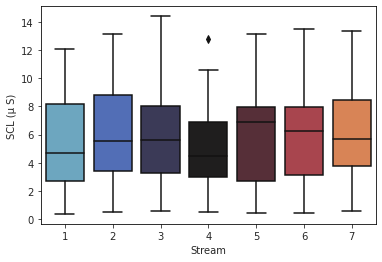

In [53]:


df = df.rename(columns={"EDATonic": "SCL (\u03bc S)", "BlockNumber": "Stream"})
tonic1 = sns.boxplot(x = "Stream", y = "SCL (\u03bc S)", data = df, palette = 'icefire') #how to change values in the columns?


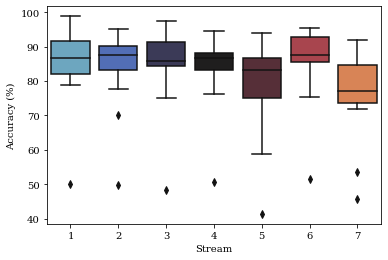

In [47]:
df = df.rename(columns={"NBackAccuracy": "Accuracy (%)", "BlockNumber": "Stream"})
sns.boxplot(x = "Stream", y = "Accuracy (%)", data = df, palette = 'icefire') #how to change values in the columns?
set_xticks([1,4,5]) 
set_xticklabels([1,4,5], fontsize=12)

In [56]:
dfQ = pd.read_csv('Q_ada.csv')
dfQ

,PId,BlockNumber,GEQ_Competence1,GEQ_Competence2,GEQ_Immersion1,GEQ_Immersion2,GEQ_PosAff1,GEQ_PosAff2,NASAMentalDemand,NASAPhysDemand,NASATempDemand,NASAPerformance,NASAEffort,NASAFrustration,RawNASASum,RawNASA,UX1,UX2
0,1,1,0,2,0,1,1,1,5,1,11,4,4,5,30,0.500000,4,4
1,1,6,0,2,0,0,1,2,5,1,6,2,8,5,27,0.450000,4,2
2,1,4,2,2,0,0,1,1,10,1,12,3,9,2,37,0.616667,4,4
3,1,2,3,1,0,0,1,2,6,1,7,2,4,4,24,0.400000,4,6
4,1,7,3,4,0,0,3,3,3,1,14,1,2,1,22,0.366667,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,20,7,3,3,2,3,3,3,10,13,6,4,11,13,57,0.950000,5,5
115,20,3,4,2,2,2,3,2,10,13,9,3,10,16,61,1.016667,3,5
116,20,2,4,3,2,2,3,3,10,16,6,4,10,17,63,1.050000,3,5
117,20,5,4,3,1,2,3,2,10,13,6,5,10,18,62,1.033333,5,5


<AxesSubplot:xlabel='Stream', ylabel='NASA - TLX | Raw Score'>

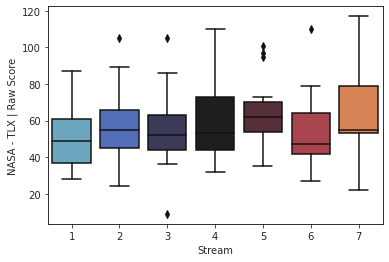

In [52]:

#sns.set_style({'font.family':'Apple SD Gothic Neo', 'font.serif':'Apple SD Gothic Neo'})

dfQ = dfQ.rename(columns={"RawNASASum": "NASA - TLX | Raw Score", "BlockNumber": "Stream"})
sns.boxplot(x = "Stream", y = "NASA - TLX | Raw Score", data = dfQ, palette = 'icefire') #how to change x ticks?


In [57]:
dfAll = pd.merge(df, dfQ, on =["PId", "BlockNumber"], how="left")
dfAll

,TimeStart,BlockNumber,AdaptationStatus,NBackN,TimeEnd,Duration,IsCorrect,NBackCorrect,NBackMissed,NBackTotal,...,NASAMentalDemand,NASAPhysDemand,NASATempDemand,NASAPerformance,NASAEffort,NASAFrustration,RawNASASum,RawNASA,UX1,UX2
0,1.662020e+09,1,1,2,1.662020e+09,360.01669,0.915730,163,0,178,...,5,1,11,4,4,5,30,0.500000,4,4
1,1.662020e+09,6,1,2,1.662021e+09,360.35229,0.941463,193,0,205,...,5,1,6,2,8,5,27,0.450000,4,2
2,1.662021e+09,4,1,2,1.662021e+09,360.05591,0.817734,166,0,203,...,10,1,12,3,9,2,37,0.616667,4,4
3,1.662022e+09,2,1,2,1.662022e+09,360.02358,0.904977,200,0,221,...,6,1,7,2,4,4,24,0.400000,4,6
4,1.662022e+09,7,2,2,1.662023e+09,360.03858,0.730159,138,3,192,...,3,1,14,1,2,1,22,0.366667,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1.662648e+09,7,2,2,1.662648e+09,360.08251,0.877451,179,1,205,...,10,13,6,4,11,13,57,0.950000,5,5
115,1.662649e+09,3,1,2,1.662649e+09,360.04636,0.847059,216,0,255,...,10,13,9,3,10,16,61,1.016667,3,5
116,1.662649e+09,2,1,2,1.662649e+09,360.01682,0.901818,248,0,275,...,10,16,6,4,10,17,63,1.050000,3,5
117,1.662650e+09,5,1,2,1.662650e+09,360.06204,0.888889,232,1,262,...,10,13,6,5,10,18,62,1.033333,5,5
